# Individual Assignment 8: School Financial Data

Program will use the .csv tax information files to create a comparison scatter plot between the tax income & expenditures of schools and tax income and outstanding debt for each state in the U.S. in 2016.

- Input: csv files
- Output: Comparison scatter plots 
- Author: Tegist Worku
- Date: 5 July 2023

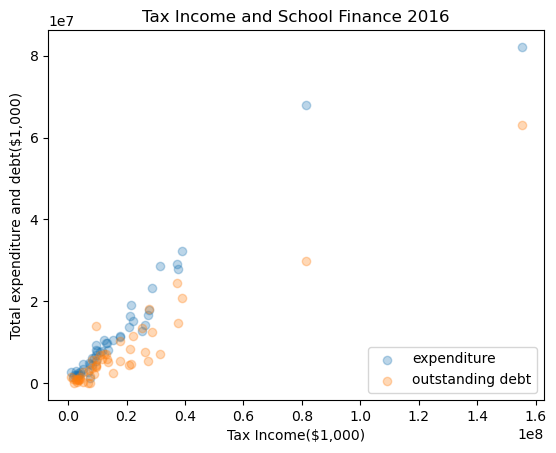

In [92]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# show plot with inline mode 
%matplotlib inline

# read in data files
data14to16 = pd.read_csv('SSF_2014-2016_00A01_with_ann.csv')
data2016 = pd.read_csv('STC_2016_00A2_with_ann.csv')

# create a mask to extract key data for the plot
maskTax = (data2016['Meaning of Tax Type']=='Total Taxes')
totalTax2016 = data2016[maskTax]
# only select desired columns
taxIncome2016 = totalTax2016[['Geographic area name','Amount ($1,000)']]

# mask to extract only 2016 data
maskExpend = (data14to16['Year']==2016)
data2016 = data14to16[maskExpend]
# selecting desired columns
expendDebt = data2016[['Geographic area name','Total ependiture ($1,000)', 'Debt outstanding at end of fiscal year ($1,000)']]

# merging expenditure & outstanding debt with total taxes using the geo area name
combine = expendDebt.merge(taxIncome2016)
combine = combine.fillna(0)

# defining the colums to show on graph
x = combine['Amount ($1,000)']
yExpenditure = combine['Total ependiture ($1,000)']
yDebt = combine['Debt outstanding at end of fiscal year ($1,000)']

# scatter plot to show relationship between (1)tax income & expenditure, 
# (2)tax income & outstanding debt 
plt.scatter(x, yExpenditure, alpha=0.3, label="expenditure")
plt.scatter(x, yDebt, alpha=0.3, label = "outstanding debt")

# title, axes labels, & legend
plt.title("Tax Income and School Finance 2016")
plt.xlabel("Tax Income($1,000)")
plt.ylabel("Total expenditure and debt($1,000)")
plt.legend(loc="lower right")